# I was able to secure a place in TOP 13% in kaggle's Titanic dataset competition


## 1) Exploratory data analysis




- Data extraction : we'll load the dataset and have a first look at it.
- Cleaning : we'll fill in missing values.
- Plotting : we'll create some interesting charts that'll (hopefully) spot correlations and hidden insights out of the data.
- Assumptions : we'll formulate hypotheses from the charts.


In [1]:
##### imports ####
# matplotlib.pylot
# pandas
# numpy

#remove warnings
import warnings
warnings.filterwarnings('ignore')
# ---
%matplotlib inline
#---

import pandas as pd
pd.options.display.max_columns = 100
#---

from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
#---
import numpy as np

** its always a good habit to get familiar with the dataset **

In [2]:
data = pd.read_csv('train.csv')

print "rows ,cols"
data.shape

rows ,cols


(891, 12)

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

### Since we have to predict the survival, it is the target variable.

- **SibSp:** number of siblings and spouses traveling with the passenger
- **Parch:** number of parents and children traveling with the passenger
- **Pclass:** passenger class with values as 1,2,3

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<br><br>
<font size=4> we can see that the number values available in Age column (714) is less than the total values available in the dataset (891)...  this shows that there are (177) missing values</font>

In this case we can consider replacing missing values with median values which are more robust than mean values
<br><br>

In [6]:
data.Age.fillna( data.Age.median(), inplace= True )

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### now the values have been filled

## VISUALIZING THE DATA

In [8]:
survived_sex = data[ data.Survived==1 ]["Sex"].value_counts()
dead_sex = data[ data.Survived==0 ]["Sex"].value_counts()

print survived_sex
print "\n"
print dead_sex


female    233
male      109
Name: Sex, dtype: int64


male      468
female     81
Name: Sex, dtype: int64


     female  male
Sex     233   109
Sex      81   468


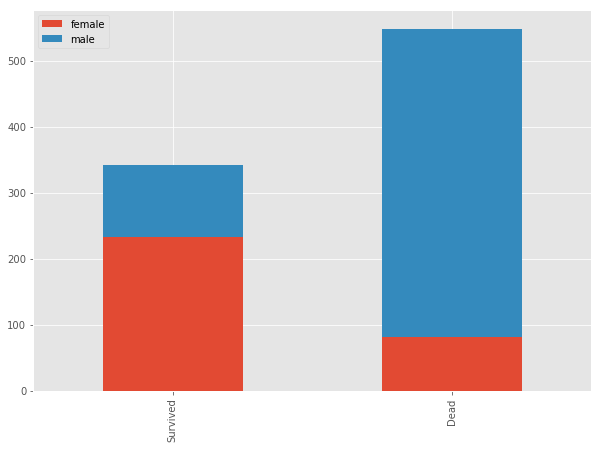

In [9]:
df = pd.DataFrame([survived_sex, dead_sex])
print df

df.index=["Survived","Dead"]
df.plot(kind="bar",stacked=True,figsize=(10,7))


Sex is Categorical data, so we used bargraph and used the   .valuecount() method
<font size = 4> 
From the above graph we can see that the gender is a survival factor.<br>
Women were more likely to survive than men
</font>
<br><br>
### Lets try to corelate the "AGE" and "SURVIVAL" factors

In [10]:
survived_age = data[data.Survived==1]['Age']
dead_age = data[data.Survived==0]['Age']


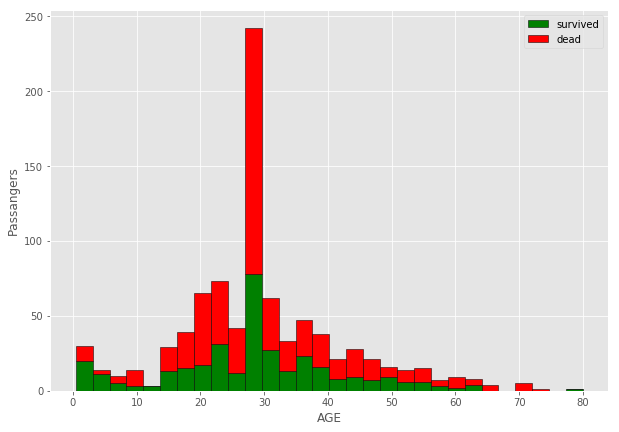

In [11]:
figure = plt.figure(figsize=(10,7))

plt.hist([survived_age,dead_age], 
         bins=30, 
         stacked=True, 
         color=['g','r'], 
         label=['survived','dead'],
        ec = "black")
plt.xlabel("AGE")
plt.ylabel("Passangers")
plt.legend()

<font size =4>We can see over here that the ones  **below 15**  are more likely to survive than the ones above it....<br> we have to look at the **survived to dead ratio**</font>

### Now lets take a look at the corelation between ticket fare and survival 

In [12]:
survived_fare = data[data.Survived==1]['Fare']
dead_fare = data[data.Survived==0]['Fare']

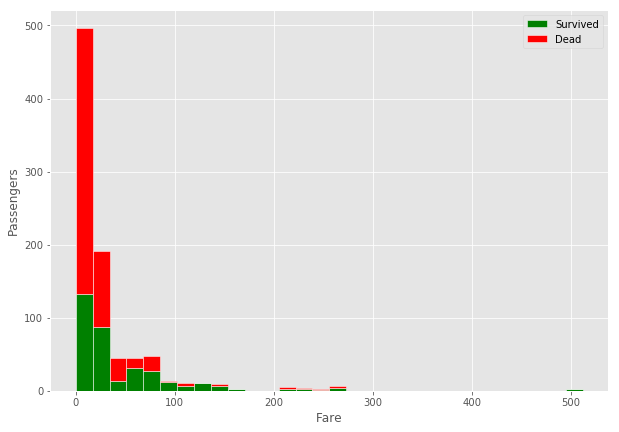

In [13]:
figure = plt.figure(figsize=(10,7))

plt.hist([survived_fare,dead_fare], bins=30, ec='w', label=["Survived",'Dead'], color=['g','r'], stacked=True)
plt.xlabel("Fare")
plt.ylabel("Passengers")
plt.legend()

<font size = 4>
From the above chart we can see that the people with costlier titckets are more probable to survive... put in other way, we can also say, the people with more socio economic importance had more chances of survival
</font>

## lets try and plot Age, Fare and Survival on single chart

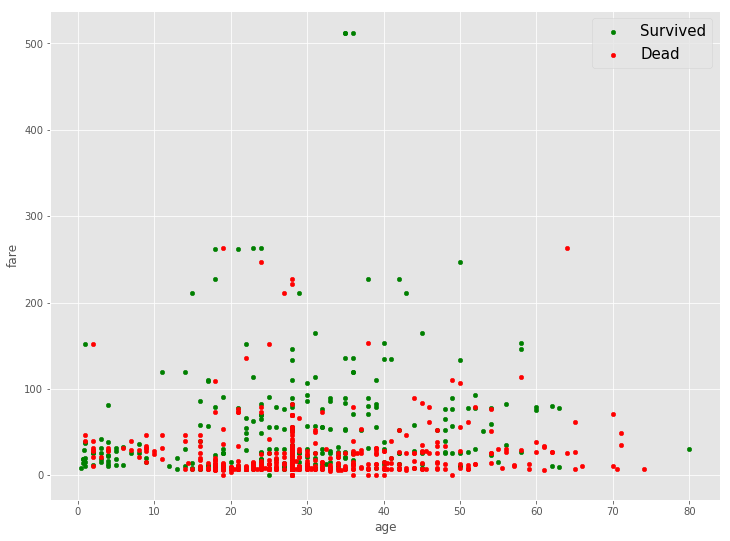

In [14]:
figure = plt.figure(figsize=(12,9))
ax = plt.subplot()
ax.scatter(survived_age,survived_fare,c='g',s=20)
ax.scatter(dead_age,dead_fare,c='r',s=20)
ax.set_xlabel("age")
ax.set_ylabel("fare")

ax.legend(('Survived','Dead'),fontsize=15)

<font size = 4>
In the above chart we can see that there does exist a correlation... people with **"cheaper tickets"** and **"age greater than 15"** have the most probability of dying  
</font>


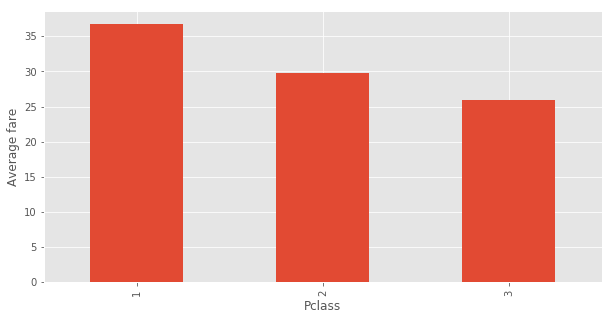

In [15]:
ax = plt.subplot()
ax.set_ylabel('Average fare') #we will calculate the mean
data.groupby('Pclass')['Age'].mean().plot(kind="bar",figsize=(10,5),ax=ax)



In [16]:
survived_embark = data[data.Survived==1]['Embarked'].value_counts()
dead_embark = data[data.Survived==0]['Embarked'].value_counts()

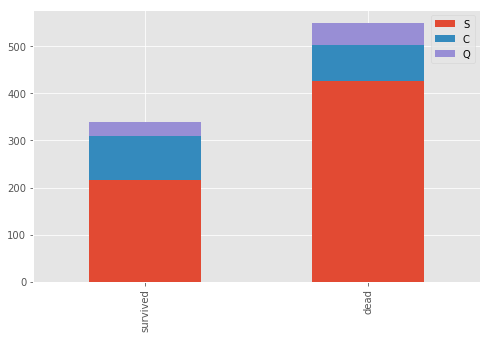

In [17]:
df = pd.DataFrame([survived_embark,dead_embark])
df.index = ['survived','dead']
df.plot(kind='bar',stacked=True,figsize=(8,5),fontsize= 10)

#### There seems to be no distinct relation between them 

# 2). CLEANING & FEATURE ENGINEERING :

<font size=3>
Till now we have played with the data and tried to spot any imediate correlations....<br>
However, we couldn't manage to analyze more complicated features like the names or the tickets because these required further processing.<br><br>
we'll now focus on the ways to transform these specific features in such a way they become easily fed to machine learning algorithms.<br><br>**first, let's define a print function that asserts whether or not a feature has been processed.**
</font>

In [18]:
def status(feature):

    print 'Processing',feature,': ok'

### Loading the data
<font size=3>
One trick when starting a machine learning problem is to combine the training set and the test set together. This is a useful technique especially when your test set appears to have a feature that doesn't exist in the training set. Therefore, if we don't combine the two sets, testing our model on the test set will dramatically fail.
<br><br>
Besides, combining the two sets will save us some repeated work to do later on when testing.
</font>

In [19]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


# extracting and then removing the targets from the training data 
targets = train.Survived
train.drop('Survived',1,inplace=True) # 1 is the axis   column axis =1 

combined = train.append(test)
combined.reset_index(inplace=True)
combined.drop('index',inplace=True,axis=1)


In [20]:
combined

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [21]:
combined.shape

(1309, 11)

In [22]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
combined['Title'] = combined.Name.map(lambda name: name.split(',')[1].split('.')[0].strip())


In [24]:
print combined.Title.unique()
keys = combined.Title.unique()

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']


In [25]:
values = ['Mr','Mrs','Miss','Master','Royalty','Officer','Officer','Mrs','Mrs','Officer','Royalty','Royalty','Miss','Officer','Officer','Royalty','Royalty','Royalty']

Title_dict={}
for i in range(len(values)):
    Title_dict[keys[i]] = values[i]

In [26]:
Title_dict

{'Capt': 'Officer',
 'Col': 'Officer',
 'Don': 'Royalty',
 'Dona': 'Royalty',
 'Dr': 'Officer',
 'Jonkheer': 'Royalty',
 'Lady': 'Royalty',
 'Major': 'Officer',
 'Master': 'Master',
 'Miss': 'Miss',
 'Mlle': 'Miss',
 'Mme': 'Mrs',
 'Mr': 'Mr',
 'Mrs': 'Mrs',
 'Ms': 'Mrs',
 'Rev': 'Officer',
 'Sir': 'Royalty',
 'the Countess': 'Royalty'}

In [27]:
combined.Title= combined.Title.map(Title_dict)

In [28]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr



Processing the ages

We have seen in the first part that the Age variable was missing 177 values. This is a large number ( ~ 13% of the dataset). Simply replacing them with the mean or the median age might not be the best solution since the age may differ by groups and categories of passengers.

To understand why, let's **group our dataset by sex, Title and passenger class** and for each subset compute the median age.

To avoid data leakage from the test set, we perform these operations separately on the train set and the test set.


In [29]:
# 891: -> 891 k baad sab lele
grouped_train = combined.head(891).groupby(['Sex','Pclass','Title'])
grouped_test = combined.iloc[891:].groupby(['Sex','Pclass','Title'])

grouped_median_train=grouped_train.median()
grouped_median_test=grouped_test.median()

In [30]:
grouped_median_test

PassengerId   Age  SibSp  Parch       Fare
Sex    Pclass Title                                              
female 1      Miss          1074.0  32.0    0.0    0.0  158.20835
              Mrs           1076.0  48.0    1.0    0.0   63.35830
              Royalty       1306.0  39.0    0.0    0.0  108.90000
       2      Miss          1121.0  19.5    1.0    1.0   24.50000
              Mrs           1123.5  29.0    0.0    0.0   26.00000
       3      Miss          1090.5  22.0    0.0    0.0    7.87920
              Mrs           1048.0  28.0    1.0    0.5   14.28125
male   1      Master        1022.0   9.5    1.0    2.0  198.43750
              Mr            1102.0  42.0    0.0    0.0   50.24790
              Officer       1094.0  53.0    1.0    0.0   81.85830
       2      Master        1033.5   5.0    0.5    1.5   27.75000
              Mr            1156.0  28.0    0.0    0.0   13.00000
              Officer       1048.5  35.5    0.5    0.5   19.50000
       3      Master        1173.0   7.0    1.0    1.0   15.24580
              Mr            1101.0  25.0    0.0    0.0    7.85420

Look at the median age column and see how this value can be different based on the Sex, Pclass and Title put together.

For example:

    If the passenger is female, from Pclass 1, and from royalty the median age is 39.
    If the passenger is male, from Pclass 3, with a Mr title, the median age is 26.


### Lets fill in the missing age in combined based on these different attributes.

In [31]:

def fillAges(row, grouped_median):
    if row['Sex']=='female' and row['Pclass'] == 1:
        if row['Title'] == 'Miss':
            return grouped_median.loc['female', 1, 'Miss']['Age']
        elif row['Title'] == 'Mrs':
            return grouped_median.loc['female', 1, 'Mrs']['Age']
        elif row['Title'] == 'Officer':
            return grouped_median.loc['female', 1, 'Officer']['Age']
        elif row['Title'] == 'Royalty':
            return grouped_median.loc['female', 1, 'Royalty']['Age']

    elif row['Sex']=='female' and row['Pclass'] == 2:
        if row['Title'] == 'Miss':
            return grouped_median.loc['female', 2, 'Miss']['Age']
        elif row['Title'] == 'Mrs':
            return grouped_median.loc['female', 2, 'Mrs']['Age']

    elif row['Sex']=='female' and row['Pclass'] == 3:
        if row['Title'] == 'Miss':
            return grouped_median.loc['female', 3, 'Miss']['Age']
        elif row['Title'] == 'Mrs':
            return grouped_median.loc['female', 3, 'Mrs']['Age']

    elif row['Sex']=='male' and row['Pclass'] == 1:
        if row['Title'] == 'Master':
            return grouped_median.loc['male', 1, 'Master']['Age']
        elif row['Title'] == 'Mr':
            return grouped_median.loc['male', 1, 'Mr']['Age']
        elif row['Title'] == 'Officer':
            return grouped_median.loc['male', 1, 'Officer']['Age']
        elif row['Title'] == 'Royalty':
            return grouped_median.loc['male', 1, 'Royalty']['Age']

    elif row['Sex']=='male' and row['Pclass'] == 2:
        if row['Title'] == 'Master':
            return grouped_median.loc['male', 2, 'Master']['Age']
        elif row['Title'] == 'Mr':
            return grouped_median.loc['male', 2, 'Mr']['Age']
        elif row['Title'] == 'Officer':
            return grouped_median.loc['male', 2, 'Officer']['Age']

    elif row['Sex']=='male' and row['Pclass'] == 3:
        if row['Title'] == 'Master':
            return grouped_median.loc['male', 3, 'Master']['Age']
        elif row['Title'] == 'Mr':
            return grouped_median.loc['male', 3, 'Mr']['Age']

we can also use this instead of the above
**combined["Age"] = combined.groupby(['Sex','Pclass','Title'])['Age'].transform(lambda x: x.fillna(x.median()))**

In [32]:
combined.head(891).Age = combined.head(891).apply(lambda r: fillAges(r,grouped_median_train) if np.isnan(r.Age) else r.Age, axis=1)
combined.iloc[891:].Age = combined.iloc[891:].apply(lambda r: fillAges(r,grouped_median_test) if np.isnan(r.Age) else r.Age, axis=1)

In [33]:
status("AGE")

Processing AGE : ok


In [34]:
print combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Title          1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB
None


** All the Empty AGE records have been filled in **

but now we can see that there is **1 missing value in Fare,many missing values in cabin and 2 missing values in Embarked**

In [35]:
combined.drop('Name',inplace=True,axis=1)


In [36]:
title_dummies = pd.get_dummies(combined['Title'],prefix='Title')
title_dummies.head()

,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


In [37]:
combined = pd.concat([combined,title_dummies],axis=1)
combined.drop("Title",axis=1,inplace=True)

In [38]:
status('Name')

Processing Name : ok


In [39]:
combined.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0


### Name eliminated and  new variables added as Title_x which are binaries

In [40]:
combined.head(891).Fare.fillna(combined.head(891).Fare.mean(),inplace=True)
combined.iloc[891:].Fare.fillna(combined.iloc[891:].Fare.mean(),inplace=True)


In [41]:
status("Fare")

Processing Fare : ok


### Fill in missing values for embarked

In [42]:
print combined.Embarked.mode()

#filling in missing values for embarked:
combined.head(891).Embarked.fillna('S',inplace=True)
combined.iloc[891:].Embarked.fillna('S',inplace=True)

0    S
dtype: object


In [43]:
### Dummy encoding:
embarked_dummies = pd.get_dummies(combined.Embarked,prefix="Embarked")
combined.drop('Embarked',inplace=True,axis=1)
combined = pd.concat([combined,embarked_dummies],axis=1)


## now processing cabin

In [44]:
# filling in NaN's
combined.Cabin.fillna('U',inplace=True)

# we retreive only the letter from the cabin numbers
combined.Cabin = combined.Cabin.map(lambda x:x[0])

#dummy encoding
cabin_dummies =pd.get_dummies(combined.Cabin,prefix="Cabin")
combined = pd.concat([combined,cabin_dummies],axis=1)
combined.drop("Cabin",inplace=True,axis=1)

In [45]:
combined.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,3,male,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,2,1,female,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [46]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 26 columns):
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null object
Age              1309 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Ticket           1309 non-null object
Fare             1309 non-null float64
Title_Master     1309 non-null uint8
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8
Title_Officer    1309 non-null uint8
Title_Royalty    1309 non-null uint8
Embarked_C       1309 non-null uint8
Embarked_Q       1309 non-null uint8
Embarked_S       1309 non-null uint8
Cabin_A          1309 non-null uint8
Cabin_B          1309 non-null uint8
Cabin_C          1309 non-null uint8
Cabin_D          1309 non-null uint8
Cabin_E          1309 non-null uint8
Cabin_F          1309 non-null uint8
Cabin_G          1309 non-null uint8

## so now we see that there are no missing values


# processing Sex

<font size =3>
Converting Sex to integer or bolean
</font>

In [47]:
combined.Sex = combined.Sex.map({'male':1,'female':0})
# we couldve done it with lambda & if else or with dummies too

In [48]:
pclass_dummies = pd.get_dummies(combined.Pclass,prefix="Pclass")
combined = pd.concat([combined,pclass_dummies],axis=1)
combined.drop("Pclass",axis=1,inplace=True)

In [49]:
status("Pclass")

Processing Pclass : ok


## ---------------  working of ticket code  -----------------

In [50]:
ticket =  'STON/O2. 3101282'
ticket = ticket.replace('.','')
ticket = ticket.replace('/','')
print ticket
ticket = ticket.split()
print ticket
ticket = map(lambda t : t.strip(), ticket)
print ticket
ticket = filter(lambda t : not t.isdigit(), ticket)
print ticket
if len(ticket) > 0:
    print ticket[0]
else: 
    print 'XXX'

STONO2 3101282
['STONO2', '3101282']
['STONO2', '3101282']
['STONO2']
STONO2


## --------------------------------------------------------------------

In [51]:

def cleanticket(ticket):
    ticket = ticket.replace('/','')
    ticket = ticket.replace('.','')
    ticket = ticket.split()
    ticket = map(lambda t:t.strip(),ticket)
    ticket = filter ( lambda t : not t.isdigit(),ticket)
    if len(ticket)>0:
        return ticket[0]
    else:
        return 'XXX'

In [52]:
combined.Ticket = combined.Ticket.map(cleanticket)

#### Tickets have been cleaned... now lets create categories/dummies out of it

In [53]:
ticket_dummies = pd.get_dummies(combined.Ticket,prefix="Ticket")
combined = pd.concat([combined,ticket_dummies],axis=1)
combined.drop("Ticket",axis=1,inplace=True)

**Tickets have been cleaned and categories have been added**

## processing family i.e Parch (Parent Children) + Sibsp (sibling )



This part includes creating new variables based on the size of the family (the size is by the way, another variable we create).

This creation of new variables is done under a realistic assumption: Large families are grouped together, hence they are more likely to get rescued than people traveling alone.


In [54]:
# parents + children + sib + 1 //the passanger
combined["Familysize"]=combined.Parch+combined.SibSp+1

In [55]:
# we would like to measure the survival ranking based on the size of the 
#family hence distinguishing between diff family sizes

combined['Singleton'] = combined.Familysize.map(lambda s: 1 if s ==1 else 0)
combined['Smallfamily'] = combined.Familysize.map(lambda s: 1 if 1<s<=4 else 0)
combined['Largefamily'] = combined.Familysize.map(lambda s: 1 if 4<s else 0)

In [56]:
combined.shape

(1309, 68)

## now we have 68 features

lets remove the passengerid column as it does not have any informative value

In [57]:
combined.drop('PassengerId',axis=1,inplace=True)

In [58]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 67 columns):
Sex               1309 non-null int64
Age               1309 non-null float64
SibSp             1309 non-null int64
Parch             1309 non-null int64
Fare              1309 non-null float64
Title_Master      1309 non-null uint8
Title_Miss        1309 non-null uint8
Title_Mr          1309 non-null uint8
Title_Mrs         1309 non-null uint8
Title_Officer     1309 non-null uint8
Title_Royalty     1309 non-null uint8
Embarked_C        1309 non-null uint8
Embarked_Q        1309 non-null uint8
Embarked_S        1309 non-null uint8
Cabin_A           1309 non-null uint8
Cabin_B           1309 non-null uint8
Cabin_C           1309 non-null uint8
Cabin_D           1309 non-null uint8
Cabin_E           1309 non-null uint8
Cabin_F           1309 non-null uint8
Cabin_G           1309 non-null uint8
Cabin_T           1309 non-null uint8
Cabin_U           1309 non-null uint8
Pclass_1       

# 3) MODELLING (preparing for and performing ML)

<font size = 4>In this part, we use our knowledge of the passengers based on the features we created and then build a statistical model. You can think of this model as a black box that crunches the information of any new passenger and decides whether or not he survives.<br><br>

There is a wide variety of models to use, from logistic regression to decision trees and more sophisticated ones such as random forests and gradient boosted trees.</font>

We now have to:
- Break the combined dataset in train set and test set.
- Use the train set to build a predictive model.
- Evaluate the model using the train set.
- Test the model using the test set and generate and output file for the submission.

Keep in mind that we'll have to reiterate on 2. and 3. until an acceptable evaluation score is achieved.

In [59]:


from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score



/home/harsh/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/harsh/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


<font size =3>
    Creating a function for testing the score on cross validation
</font>

In [60]:
def compute_score(clf,X,y,scoring ='accuracy'):
    xval = cross_val_score(clf,X,y,cv=5,scoring =scoring)
    return np.mean(xval)

In [61]:
old_set = pd.read_csv('train.csv')

target = old_set.Survived
train = combined.head(891)
test = combined.iloc[891:]

# Feature Selection

<font size =4>
Here for simplicity sake we'll use tree classifier for feature selection by using feature importances
</font>

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

clf = RandomForestClassifier(n_estimators=50,max_features='sqrt')
clf.fit_transform(train,target)

/home/harsh/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[  1.,  22.,   1., ...,   1.,   2.,   1.],
       [  0.,  38.,   1., ...,   0.,   2.,   1.],
       [  0.,  26.,   0., ...,   1.,   1.,   0.],
       ..., 
       [  0.,  18.,   1., ...,   1.,   4.,   1.],
       [  1.,  26.,   0., ...,   0.,   1.,   0.],
       [  1.,  32.,   0., ...,   1.,   1.,   0.]])

In [63]:
imp_graph = pd.DataFrame()
imp_graph["Features"] = train.columns
imp_graph["Importances"] = clf.feature_importances_
imp_graph.sort_values(by="Importances",ascending=True,inplace=True)
imp_graph.set_index("Features",inplace=True)

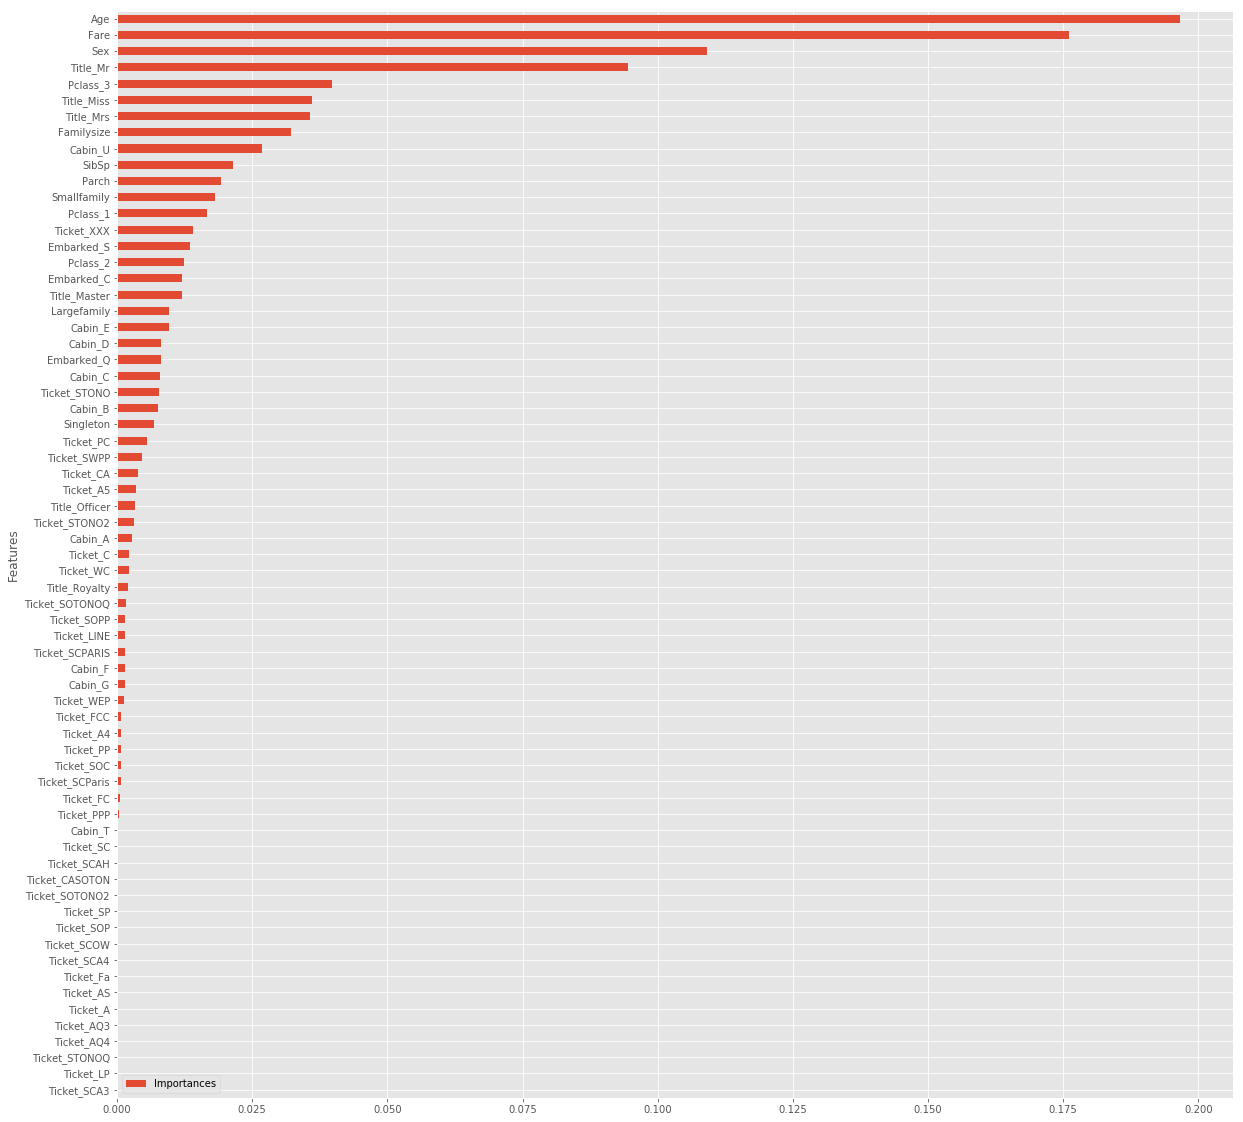

In [64]:

imp_graph.plot(kind="barh",figsize=(20,20))

<font size =4>
This plot makes it visible that, there is a great importance linked to Title_Mr, Age, Fare, and Sex.
Let's now transform our train set and test set in a more compact datasets.
</font>

In [65]:
model = SelectFromModel(clf,prefit=True)


In [66]:
train_reduced =model.transform(train)
test_reduced = model.transform(test)

In [67]:
print train_reduced.shape
print test_reduced.shape

(891, 13)
(418, 13)


###  We have successfully reduced to 13 features from 68

## Hyperparamter tuning 

In [ ]:
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [5, 3, 10],
                 'min_samples_leaf': [5, 3, 10],
                 'bootstrap': [True, False],
                 }
    
    #-----------
    forest = RandomForestClassifier()
    crossvalidation = StratifiedKFold(target,n_folds=5)
    
    #-----------
    grid_search = GridSearchCV(
    forest,
    scoring="accuracy",
    param_grid=parameter_grid,
    cv=crossvalidation
    )
    
    #-----------
    grid_search.fit(train,target)
    model = grid_search
    parameters = grid_search.best_params_
                        
        
    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))

In [68]:
parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
              'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}

model = RandomForestClassifier(**parameters)
model.fit(train, targets)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=6, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [69]:
compute_score(model, train, targets, scoring='accuracy')



0.82720297667873499

In [70]:
op = model.predict(test).astype('int')

df=pd.DataFrame()
aux = pd.read_csv('test.csv')

df['PassengerId'] = aux['PassengerId']
df['Survived'] = op
df[['PassengerId','Survived']].to_csv('titanic_final_op.csv',index=False)